# Aula 03: Reg Logística e Baive Bayes

Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

In [1]:
import pandas as pd
df = pd.read_csv("/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Trabalhinhos/Trabalho Aula 03/titanic.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Tratamento da base

In [2]:
df = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']].copy()
df

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=df.columns)
df_escalado.fillna(df_escalado.mean(), inplace=True)
df_escalado.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,0.273456,0.014151,0.0,0.125,0.0,1.0,1.0,0.0
1,0.473882,0.139136,1.0,0.125,0.0,0.0,0.0,1.0
2,0.323563,0.015469,1.0,0.000,0.0,1.0,1.0,1.0
3,0.436302,0.103644,1.0,0.125,0.0,0.0,1.0,1.0
4,0.436302,0.015713,0.0,0.000,0.0,1.0,1.0,0.0


In [4]:
alvo = '2urvived'
variaveis = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_escalado[variaveis], df_escalado[alvo] ,test_size=0.2)

X_train.head(3)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
1021,0.398722,0.015713,0.0,0.0,0.0,1.0,1.0
1195,0.348616,0.015127,1.0,0.0,0.0,1.0,0.5
867,0.386196,0.098561,0.0,0.0,0.0,0.0,1.0


# Regressão Logística

In [5]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import accuracy_score

rlog = skl_lm.LogisticRegression()
rlog.fit(X_train,y_train)

acc_train = rlog.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = rlog.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.7984718242597899
acc_teste: 0.7480916030534351


              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       188
         1.0       0.61      0.30      0.40        74

    accuracy                           0.75       262
   macro avg       0.69      0.61      0.62       262
weighted avg       0.73      0.75      0.72       262

[[174  14]
 [ 52  22]]


<Axes: >

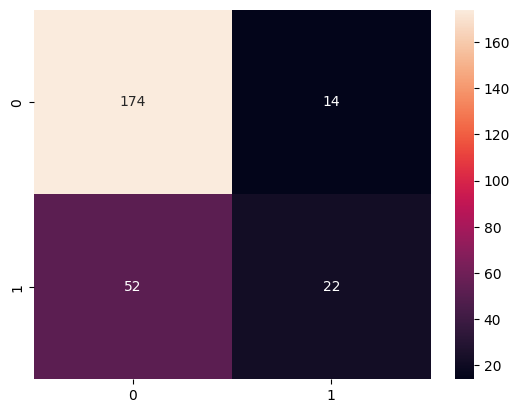

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

# Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train, y_train)
acc_train = rlog.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = rlog.predict(X_test)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)


acc_treino: 0.7984718242597899
acc_teste: 0.7480916030534351


              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       188
         1.0       0.61      0.30      0.40        74

    accuracy                           0.75       262
   macro avg       0.69      0.61      0.62       262
weighted avg       0.73      0.75      0.72       262

[[174  14]
 [ 52  22]]


<Axes: >

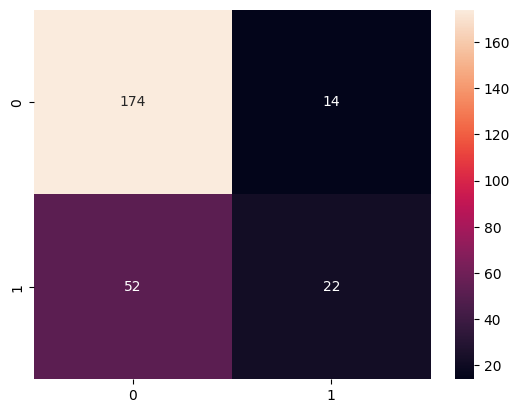

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

# Conclusão

- Ambos os resultados foram iguais, buscando entender o motivo descobrimos que isso pode acontecer pois ambos os algoritmos trabalham com probabilidade e como os dados foram normalizados no início do exercício é totalmente aceitável os algoritimos terem o mesmo resultado.
- Ambos os modelos tiveram 78% de acurácia, ou seja, acertaram 78% das previsões.
- A classe 0 (passageiros que morreram) foi bem prevista, com precisão de 81% e recall de 93%.
- A classe 1 (passageiros que sobreviveram) teve um desempenho ruim, com precisão de 63% e recall de apenas 33%. Isso significa que o modelo tem dificuldade em prever corretamente os sobreviventes.
- O f1-score da classe 1 é 0.44, indicando que o modelo não consegue equilibrar bem precisão e recall para essa classe.